In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, utils
from tensorflow.keras import models, layers, activations, initializers, losses, optimizers, metrics
import os
tf.logging.set_verbosity(tf.logging.ERROR)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [2]:
# 데이터 가져와서 train, test 나누기
(train_data, train_label), (test_data, test_label) = datasets.mnist.load_data()

print(train_data.shape) 
print(test_data.shape) 

(60000, 28, 28)
(10000, 28, 28)
uint8
255


In [3]:
# 0~1 사이의 값으로 정규화 하기 위해서 255로 나눠준다.
train_data = train_data.reshape(60000, 784).astype('float32') / 255.0 
test_data = test_data.reshape(10000, 784).astype('float32') / 255.0 

# 원핫 인코딩
train_label = utils.to_categorical(train_label) 
test_label = utils.to_categorical(test_label) 

# 모델 선언, Sequential에 add로 쌓아가는 느낌
model = models.Sequential()

# tf.keras.layers input_dim = x데이터의 열수  units = 퍼셉트론 수
# Dense는 기본적인것. LSTM / CNN등으로 바뀜
model.add(layers.Dense(input_dim=784, units=512, activation='relu', kernel_initializer='he_uniform'))
model.add(layers.BatchNormalization())
# 'elu'가 더 좋을수도 있음 (layers.ELU or layers.LeakyReLU)
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(units=256, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(rate=0.2))

# 마지막 레이어 add
model.add(layers.Dense(units=10, activation='softmax')) # 0~9
# 모델 옵션 적용
model.compile(optimizer=optimizers.Adam(), 
              loss=losses.categorical_crossentropy, 
              metrics=[metrics.categorical_accuracy]) 

# 모델 훈련, 히스토리로 정확도의 추이를 볼 수 있다.
history = model.fit(train_data, train_label, batch_size=100, epochs=1, validation_split=0.2)

# 모델 테스트
result = model.evaluate(test_data, test_label, batch_size=100)
print('loss (cross-entropy) :', result[0])
print('test accuracy :', result[1])

# 모델 저장
model.save('mnist_2layer_bn100_e15.h5')

# 모델 불러오기
model_ = models.load_model('mnist_2layer_bn100_e15.h5')
result = model_.evaluate(test_data, test_label, batch_size=100)
print('loss (cross-entropy) :', result[0])
print('test accuracy :', result[1])

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 4s 87us/sample - loss: 0.2520 - categorical_accuracy: 0.9261 - val_loss: 0.1162 - val_categorical_accuracy: 0.9654
Epoch 2/15
48000/48000 [==============================] - 3s 72us/sample - loss: 0.1059 - categorical_accuracy: 0.9672 - val_loss: 0.0972 - val_categorical_accuracy: 0.9697
Epoch 3/15
48000/48000 [==============================] - 3s 71us/sample - loss: 0.0748 - categorical_accuracy: 0.9761 - val_loss: 0.0946 - val_categorical_accuracy: 0.9731
Epoch 4/15
48000/48000 [==============================] - 3s 73us/sample - loss: 0.0599 - categorical_accuracy: 0.9807 - val_loss: 0.0796 - val_categorical_accuracy: 0.9768
Epoch 5/15
48000/48000 [==============================] - 3s 73us/sample - loss: 0.0498 - categorical_accuracy: 0.9840 - val_loss: 0.0820 - val_categorical_accuracy: 0.9766
Epoch 6/15
48000/48000 [==============================] - 3s 73us/sample - loss: 0.04

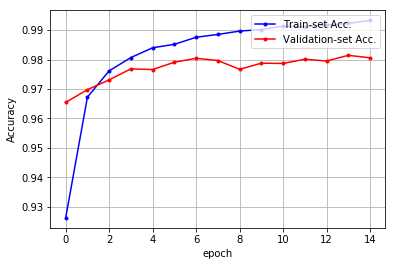

In [5]:
# 히스토리 시각화.
history.history.keys()
val_acc = history.history['val_categorical_accuracy']
acc = history.history['categorical_accuracy']

import numpy as np
import matplotlib.pyplot as plt

x_len = np.arange(len(acc))
plt.plot(x_len, acc, marker='.', c='blue', label="Train-set Acc.")
plt.plot(x_len, val_acc, marker='.', c='red', label="Validation-set Acc.")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.show()